<a href="https://colab.research.google.com/github/Dimas263/nlp_bert_relation_extraction/blob/main/BiomedNLP_PubMedBERT_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/>  **NLP Research**
# **Bert Relation Extraction in Biomedical using BiomedNLP-PubMedBERT model and pytorch**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# <img src="https://img.icons8.com/tiny-color/48/undefined/experimental-code-tiny-color.png"/> **Source Code on** [**Github**](https://github.com/Dimas263/nlp_bert_relation_extraction)
#  <img src="https://img.icons8.com/glyph-neue/64/undefined/github.png"/> [**NLP - Bert Relation Extraction Biomedical**](https://github.com/Dimas263/nlp_bert_relation_extraction)
# <img src="https://img.icons8.com/color/48/undefined/microsoft-excel-2019--v1.png"/> [**Relation Extraction Report**](https://docs.google.com/spreadsheets/d/1Q6JgAC5rDz4EM00BuAlEaraC0tm3oZoYqBu_F01md7s/edit?usp=sharing)

# <img src="https://img.icons8.com/color/48/undefined/1-circle--v1.png"/>**Connect Google Storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Requirements**

In [ ]:
# ! pip install pandas==1.4.2
# ! pip install matplotlib==3.5.1
! pip install openpyxl==3.0.9
# ! pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
! pip install transformers==4.18.0
! pip install scikit-learn==1.0.2
! pip install pickleshare==0.7.5
! pip install pickle5==0.0.12

# <img src="https://img.icons8.com/color/48/undefined/3-circle--v1.png"/>**Check Device**

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    device = torch.device("cuda")
    print("\nUsing GPU")
    print('\nDevice name:', torch.cuda.get_device_name(0))
else:
    print("\nNo GPU available, using the CPU instead.")


Using GPU

Device name: Tesla P100-PCIE-16GB


# <img src="https://img.icons8.com/color/48/undefined/4-circle--v1.png"/>**Data Preprocessing into `train set` and `test set`**

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/data_preprocessing.py"

Negative                583
Treatment_of_disease    507
Cause_of_disease        183
Association              34
Name: relation, dtype: int64
total data : 1307

success to create predict.txt
success to create train.txt
success to create test.txt


# <img src="https://img.icons8.com/color/48/undefined/5-circle--v1.png"/>**Preprocess Program**
### **preprocess data with special token using `biobert pretrained model`**

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biomedNLP_preprocess.sh"

{'output_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/BiomedNLP-PubMedBERT/', 'bert_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/BiomedNLP-PubMedBERT/', 'data_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/', 'log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/', 'main_log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/BiomedNLP-PubMedBERT-main.log', 'preprocess_log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/BiomedNLP-PubMedBERT-preprocess.log', 'num_tags': 4, 'seed': 123, 'gpu_ids': '0', 'max_seq_len': 128, 'eval_batch_size': 64, 'swa_start': 3, 'train_epochs': 100, 'dropout_prob': 0.1, 'lr': 1e-05, 'other_lr': 0.0001, 'max_grad_norm': 1, 'warmup_proportion': 0.1, 'weight_decay': 0.01, 'adam_epsilon': 1e-12, 'train_batch_size': 64, 'eval_model': True}
example_text : However, more studies need to further explore the rol

# <img src="https://img.icons8.com/color/48/undefined/6-circle--v1.png"/>**Main Program**
### **`train`, `eval`, create new `model pytorch`, test model , <br>compute `cross validation`, `f-1 score`, and <br>test predict data with new model `.pt`**

In [ ]:
f_run_main = open("/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biomedNLP_main.sh", "r")
print(f_run_main.read())

#!/usr/bin/env bash
python "drive/MyDrive/Colab Notebooks/bert_relation_extraction/main.py" \
--bert_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/BiomedNLP-PubMedBERT/" \
--data_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--main_log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/BiomedNLP-PubMedBERT-main.log" \
--preprocess_log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/BiomedNLP-PubMedBERT-preprocess.log" \
--output_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/BiomedNLP-PubMedBERT/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=1e-5 \
--other_lr=1e-4 \
--train_batch_size=16 \
--train_epochs=100 \
--eval_batch_size=16 \
--dropout_prob=0.1 \


In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biomedNLP_main.sh"

Output streaming akan dipotong hingga 5000 baris terakhir.
torch.Size([16, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.553112 accuracy：0.6596 micro_f1：0.6596 macro_f1：0.7344
torch.Size([11, 4, 768])
【train】 epoch：30 step:371/1200 loss：0.078333
torch.Size([16, 4, 768])
torch.Size([16, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.571493 accuracy：0.6596 micro_f1：0.6596 macro_f1：0.7344
torch.Size([16, 4, 768])
【train】 epoch：31 step:372/1200 loss：0.091423
torch.Size([16, 4, 768])
torch.Size([16, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.579675 accuracy：0.6596 micro_f1：0.6596 macro_f1：0.7344
torch.Size([16, 4, 768])
【train】 epoch：31 step:373/1200 loss：0.159688
torch.Size([16, 4, 768])
torch.Size([16, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.493654 accuracy：0.6383 micro_f1：0.6383 macro_f1：0.7140
torch.Size([16, 4, 768])
【train】 epoch：31 step:374/1200 loss：0.153462
torch.Size([16, 4, 768])
torch.Size([16, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.420970 accuracy：0.6596 mic

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biomedNLP_predict.sh"

{'Negative': 0, 'Cause_of_disease': 1, 'Treatment_of_disease': 2, 'Association': 3}
======== Prediction ========
OBJECTIVE: To study the role of pecan tree pollen in the development of allergy . 
torch.Size([1, 4, 768])
predict labels：Negative
true label：Negative
 Garlic consumption and cancer prevention: meta-analyses of colorectal and stomach cancers . 
torch.Size([1, 4, 768])
predict labels：Treatment_of_disease
true label：Negative
Patients with anaphylaxis to pea can have peanut allergy caused by cross-reactive IgE to vicilin (Ara h 1). 
torch.Size([1, 4, 768])
predict labels：Negative
true label：Cause_of_disease
Genetic predisposition to schizophrenia associated with increased use of cannabis . 
torch.Size([1, 4, 768])
predict labels：Negative
true label：Negative
Efficacy of cancer prevention by high-selenium garlic is primarily dependent on the action of selenium. 
torch.Size([1, 4, 768])
predict labels：Negative
true label：Treatment_of_disease
Mutagen sensitivity, tobacco smoking an

# <img src="https://img.icons8.com/color/48/undefined/7-circle--v1.png"/>**Summary**

### ***Train Output***

In [ ]:
import pandas as pd
import csv

url_view = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-train-view.csv'
url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-train.csv'

biobert_train = pd.read_csv(url_view)

print(biobert_train)

                     Time  Epoch  Step      Loss
0     2022-06-14 20:25:35      0     0  1.229355
1     2022-06-14 20:26:02      0     1  1.106556
2     2022-06-14 20:26:02      0     2  1.406058
3     2022-06-14 20:26:09      0     3  1.427826
4     2022-06-14 20:26:09      0     4  1.150533
...                   ...    ...   ...       ...
1195  2022-06-14 20:40:54     99  1195  0.003977
1196  2022-06-14 20:40:54     99  1196  0.002292
1197  2022-06-14 20:40:55     99  1197  0.002046
1198  2022-06-14 20:40:55     99  1198  0.002141
1199  2022-06-14 20:40:56     99  1199  0.004400

[1200 rows x 4 columns]


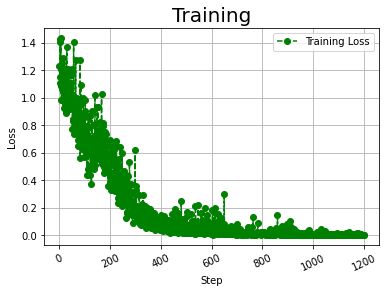

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []

with open(url, 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(int(row[2]))
        y.append(float(row[3]))

plt.plot(x, y, color='g', linestyle='dashed',
         marker='o', label="Training Loss")

plt.xticks(rotation=25)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-train-chart.py"

### ***Dev Output***

In [ ]:
dev_url_view = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-dev-view.csv'
dev_url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-dev.csv'

biobert_dev = pd.read_csv(dev_url_view)

print(biobert_dev)

                     Time      Loss  accuracy  micro_f1  macro_f1
0     2022-06-14 20:25:35  3.989423    0.2553    0.2553    0.1306
1     2022-06-14 20:26:02  3.982429    0.2766    0.2766    0.1261
2     2022-06-14 20:26:03  3.930491    0.3830    0.3830    0.1385
3     2022-06-14 20:26:09  3.864778    0.3830    0.3830    0.1385
4     2022-06-14 20:26:09  3.819381    0.2766    0.2766    0.1271
...                   ...       ...       ...       ...       ...
1195  2022-06-14 20:40:54  3.370199    0.7021    0.7021    0.7703
1196  2022-06-14 20:40:55  3.383325    0.6809    0.6809    0.7518
1197  2022-06-14 20:40:55  3.396247    0.6809    0.6809    0.7518
1198  2022-06-14 20:40:56  3.408111    0.6809    0.6809    0.7518
1199  2022-06-14 20:40:56  3.423277    0.6596    0.6596    0.7377

[1200 rows x 5 columns]


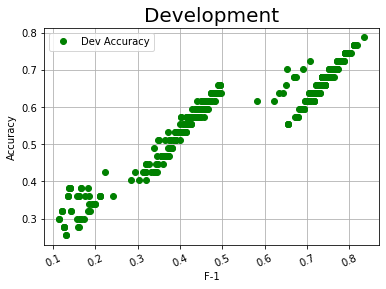

In [ ]:
dev_x = []
dev_y = []

with open(dev_url, 'r') as dev_csvfile:
    dev_lines = csv.reader(dev_csvfile, delimiter=',')
    for dev_row in dev_lines:
        dev_x.append(float(dev_row[4]))
        dev_y.append(float(dev_row[2]))

plt.plot(dev_x, dev_y, color='g', linestyle='None',
         marker='o', label="Dev Accuracy")

plt.xticks(rotation=25)
plt.xlabel('F-1')
plt.ylabel('Accuracy')
plt.title('Development', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/BiomedNLP-PubMedBERT-dev-chart.py"

### ***Training, Validation, Test***

```
2022-06-14 20:35:06,300 - INFO - main.py - train - 86 - 【train】 epoch：48 step:580/1200 loss：0.025188
2022-06-14 20:35:06,651 - INFO - main.py - train - 92 - 【dev】 loss：2.567647 accuracy：0.7872 micro_f1：0.7872 macro_f1：0.8343
2022-06-14 20:35:06,652 - INFO - main.py - train - 94 - ------------>Save best model
...
2022-06-14 20:40:56,848 - INFO - main.py - <module> - 247 - ======== Calculate Testing========
2022-06-14 20:40:59,872 - INFO - main.py - <module> - 251 - 【test】 loss：2.567647 accuracy：0.7872 micro_f1：0.7872 macro_f1：0.8343
```

```
                        precision    recall   per-class   support
                                              f1-scores

            Negative       0.83       0.67      0.74        15
    Cause_of_disease       0.69       0.92      0.79        12
Treatment_of_disease       0.83       0.79      0.81        19
         Association       1.00       1.00      1.00         1
```


<center><img src="https://img.icons8.com/external-royyan-wijaya-detailed-outline-royyan-wijaya/24/undefined/external-arrow-arrow-line-royyan-wijaya-detailed-outline-royyan-wijaya-8.png"/></center>


```
                          precision    recall   Average     support
                                               f1-scores

            accuracy                              0.79        47
           macro avg       0.84         0.84      0.83        47
        weighted avg       0.80         0.79      0.79        47
```

### **Model Output**

In [ ]:
! ls -lh "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/BiomedNLP-PubMedBERT"

total 1.3G
-rw------- 1 root root 1.3G Jun 14 20:35 best.pt


<br><br><br>
# "*Alone we can do so little, together we can do so much*"